# Import libraries

In [129]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.express as px 

pd.set_option("display.max_columns", 500)

In [130]:
# Import data 
df = pd.read_csv("Salary.csv")
df.head()
                

FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [132]:
# Replace missing values in df

def impute_missing_values(df):
    """
    Replaces missing values in a DataFrame.
    
    - Categorical columns are filled with the mode (or 'Unknown' if no mode exists).
    - Numeric columns are filled with the median (or 0 if the column is completely NaN).
    """
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical columns
            mode = df[col].mode()
            if not mode.empty:
                df[col].fillna(mode[0], inplace=True)
            else:
                df[col].fillna('Unknown', inplace=True)  # Fallback for all-NaN columns
                
        elif np.issubdtype(df[col].dtype, np.number):  # Numeric columns
            if df[col].notna().any():  # Check if there are non-NaN values
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(0, inplace=True)  # Fallback for all-NaN numeric columns

    print("Missing values imputed successfully!")
    return df

# Apply the function
df = impute_missing_values(df)

Missing values imputed successfully!


In [133]:
# Drop null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2639 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2639 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2639 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2639 non-null   float64
 10  LEAVES REMAINING  2639 non-null   float64
 11  RATINGS           2639 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [134]:
df.head()

FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE       AAKRE   F  10-19-2013   01-07-2016   Associate  24.0   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst  24.0   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web         22.0              13.0      3.0         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      3.0         3

## Drop Columns 

In [135]:
df = df.drop(columns=['FIRST NAME', 'LAST NAME'], errors='ignore') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2639 non-null   object 
 1   DOJ               2639 non-null   object 
 2   CURRENT DATE      2639 non-null   object 
 3   DESIGNATION       2639 non-null   object 
 4   AGE               2639 non-null   float64
 5   SALARY            2639 non-null   int64  
 6   UNIT              2639 non-null   object 
 7   LEAVES USED       2639 non-null   float64
 8   LEAVES REMAINING  2639 non-null   float64
 9   RATINGS           2639 non-null   float64
 10  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 226.9+ KB


In [136]:
import pandas as pd

# Convert 'DOJ' to datetime format
df['DOJ'] = pd.to_datetime(df['DOJ'])

# Calculate tenure (days from DOJ to today)
df['TENURE'] = (pd.Timestamp.today() - df['DOJ']).dt.days

df = df.drop(columns=['DOJ', 'CURRENT DATE'], errors='ignore')

print("Tenure column created successfully!")
df.head()


Tenure column created successfully!


SEX DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  LEAVES REMAINING  \
0   F     Analyst  21.0   44570     Finance         24.0               6.0   
1   F   Associate  24.0   89207         Web         22.0              13.0   
2   F     Analyst  21.0   40955     Finance         23.0               7.0   
3   F     Analyst  22.0   45550          IT         22.0               8.0   
4   M     Analyst  24.0   43161  Operations         27.0               3.0   

   RATINGS  PAST EXP  TENURE  
0      2.0         0    3916  
1      3.0         7    4127  
2      3.0         0    3845  
3      3.0         0    4326  
4      3.0         3    3730

In [137]:
df['DESIGNATION'].unique()

array(['Analyst', 'Associate', 'Senior Analyst', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [138]:
df['UNIT'].unique()

array(['Finance', 'Web', 'IT', 'Operations', 'Marketing', 'Management'],
      dtype=object)

In [139]:
# !pip install ydata-profiling
# !pip install pydantic 
# !pip install pydantic-settings

In [140]:
from ydata_profiling import ProfileReport

In [141]:
# # Generate a profile report
profile = ProfileReport(df, title="Salary Analysis Profile Report", explorative=True)

# # Display the profile report in the notebook
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]


In [142]:
# profile.to_file("salary_profile_report.html")

In [143]:
df.duplicated().sum()

161

In [144]:
df = df.drop_duplicates()

In [145]:
df.duplicated().sum()

0

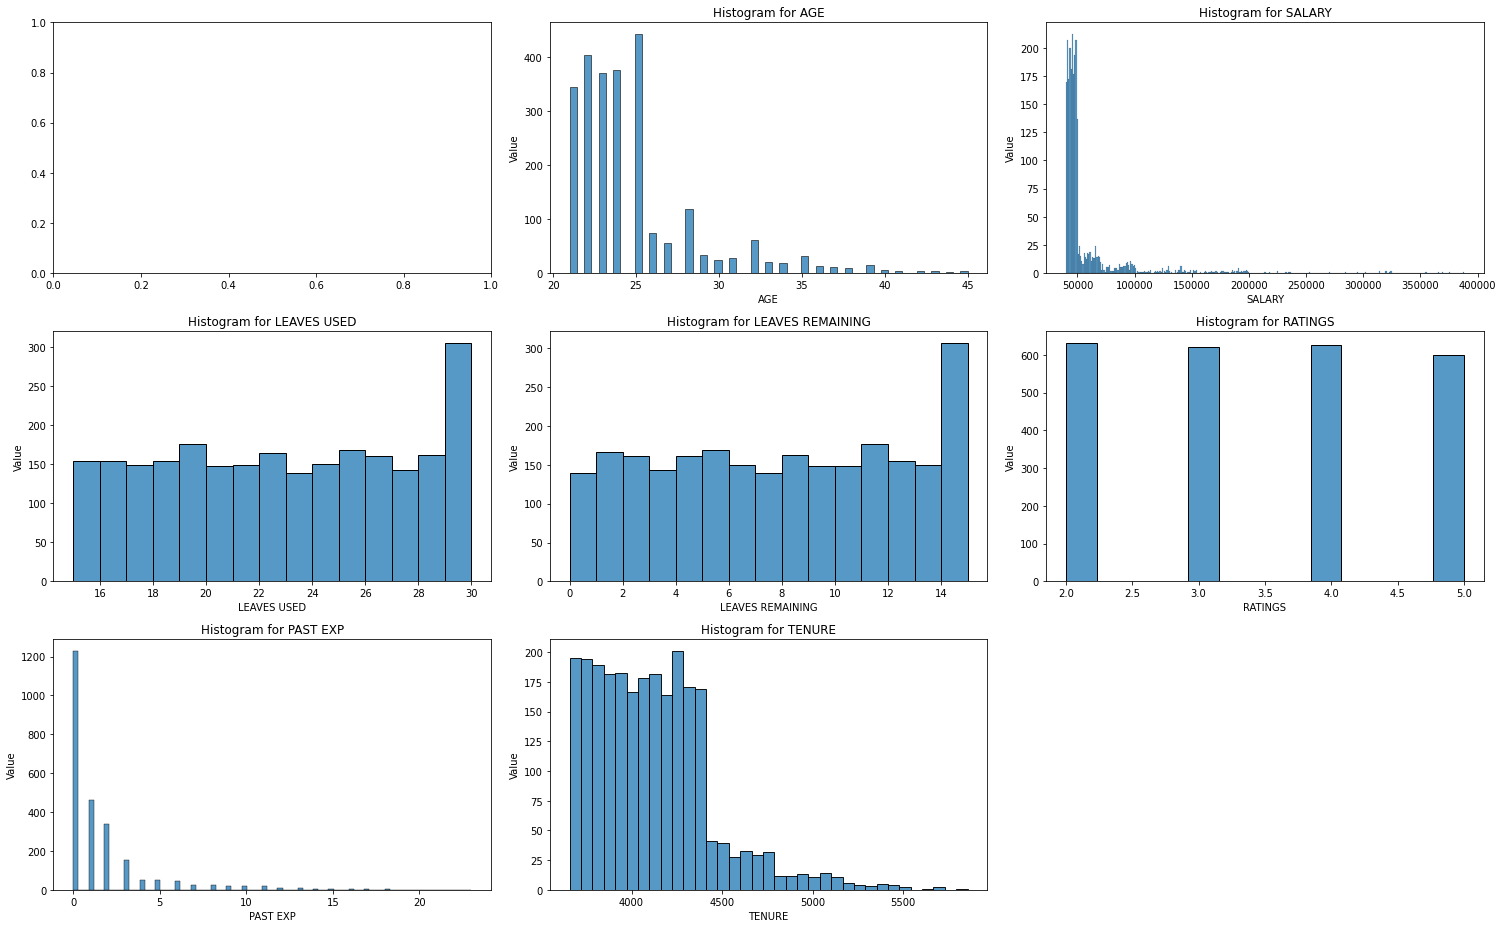

In [146]:

# Visualize data distribution
numeric_columns = df.select_dtypes(include='number').columns

# Grid layout
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))

# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns, 1):
    sns.histplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Histogram for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [147]:
data = df.copy()
data.to_csv("Salary_Clean.csv", index=False) #Saving the clean data

# Modeling 

## Data Preprocesessing 

In [148]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
df.SEX.isna().sum()

0

In [150]:
df.head()

SEX DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  LEAVES REMAINING  \
0   F     Analyst  21.0   44570     Finance         24.0               6.0   
1   F   Associate  24.0   89207         Web         22.0              13.0   
2   F     Analyst  21.0   40955     Finance         23.0               7.0   
3   F     Analyst  22.0   45550          IT         22.0               8.0   
4   M     Analyst  24.0   43161  Operations         27.0               3.0   

   RATINGS  PAST EXP  TENURE  
0      2.0         0    3916  
1      3.0         7    4127  
2      3.0         0    3845  
3      3.0         0    4326  
4      3.0         3    3730

In [151]:
# List of categorical columns to encode
categorical_columns = ['SEX', 'DESIGNATION', 'UNIT']

# Copy the DataFrame
encoded_df = df.copy()

# Explicitly fill missing values in categorical columns
# Filling with 'Unknown' helps preserve data instead of dropping rows
encoded_df[categorical_columns] = encoded_df[categorical_columns].fillna('Unknown')

# Create an instance of OneHotEncoder (sparse=False to return a dense array)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Iterate through each categorical column
for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names([column]))

    # Reset index to align with encoded_df
    one_hot_df.index = encoded_df.index

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df.drop(column, axis=1, inplace=True)

# Final encoded DataFrame
df = encoded_df.copy()

# Display the first few rows
df.head()

AGE  SALARY  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  TENURE  \
0  21.0   44570         24.0               6.0      2.0         0    3916   
1  24.0   89207         22.0              13.0      3.0         7    4127   
2  21.0   40955         23.0               7.0      3.0         0    3845   
3  22.0   45550         22.0               8.0      3.0         0    4326   
4  24.0   43161         27.0               3.0      3.0         3    3730   

   SEX_F  SEX_M  DESIGNATION_Analyst  DESIGNATION_Associate  \
0    1.0    0.0                  1.0                    0.0   
1    1.0    0.0                  0.0                    1.0   
2    1.0    0.0                  1.0                    0.0   
3    1.0    0.0                  1.0                    0.0   
4    0.0    1.0                  1.0                    0.0   

   DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                   0.0                  0.0                         0.0   
1                   0.0                  0.0                         0.0   
2                   0.0                  0.0                         0.0   
3                   0.0                  0.0                         0.0   
4                   0.0                  0.0                         0.0   

   DESIGNATION_Senior Manager  UNIT_Finance  UNIT_IT  UNIT_Management  \
0                         0.0           1.0      0.0              0.0   
1                         0.0           0.0      0.0              0.0   
2                         0.0           1.0      0.0              0.0   
3                         0.0           0.0      1.0              0.0   
4                         0.0           0.0      0.0              0.0   

   UNIT_Marketing  UNIT_Operations  UNIT_Web  
0             0.0              0.0       0.0  
1             0.0              0.0       1.0  
2             0.0              0.0       0.0  
3             0.0              0.0       0.0  
4             0.0              1.0       0.0

In [152]:
df.columns

Index(['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP', 'TENURE', 'SEX_F', 'SEX_M', 'DESIGNATION_Analyst',
       'DESIGNATION_Associate', 'DESIGNATION_Director', 'DESIGNATION_Manager',
       'DESIGNATION_Senior Analyst', 'DESIGNATION_Senior Manager',
       'UNIT_Finance', 'UNIT_IT', 'UNIT_Management', 'UNIT_Marketing',
       'UNIT_Operations', 'UNIT_Web'],
      dtype='object')

## Building The Base Model 

In [153]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Preprocessing 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# time 
import time

### Feature selection 
- Define the features and target variable 

In [154]:
# drop null values
df = df.dropna()

# Features (independent features) 
X = df.drop(columns={'SALARY'})

# Target variable/ Dependent variable 
y = df['SALARY']

### Split the data to training and testing 

In [155]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [156]:
X_train.head()

AGE  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  TENURE  SEX_F  \
1546  21.0         15.0              15.0      5.0         0    4104    1.0   
559   27.0         15.0              15.0      2.0         4    3660    0.0   
87    24.0         30.0               0.0      2.0         2    3786    1.0   
703   45.0         21.0               9.0      4.0        17    5536    1.0   
2028  22.0         15.0              15.0      5.0         0    4219    0.0   

      SEX_M  DESIGNATION_Analyst  DESIGNATION_Associate  DESIGNATION_Director  \
1546    0.0                  1.0                    0.0                   0.0   
559     1.0                  0.0                    0.0                   0.0   
87      0.0                  1.0                    0.0                   0.0   
703     0.0                  0.0                    0.0                   1.0   
2028    1.0                  1.0                    0.0                   0.0   

      DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
1546                  0.0                         0.0   
559                   0.0                         1.0   
87                    0.0                         0.0   
703                   0.0                         0.0   
2028                  0.0                         0.0   

      DESIGNATION_Senior Manager  UNIT_Finance  UNIT_IT  UNIT_Management  \
1546                         0.0           0.0      1.0              0.0   
559                          0.0           1.0      0.0              0.0   
87                           0.0           1.0      0.0              0.0   
703                          0.0           0.0      0.0              0.0   
2028                         0.0           1.0      0.0              0.0   

      UNIT_Marketing  UNIT_Operations  UNIT_Web  
1546             0.0              0.0       0.0  
559              0.0              0.0       0.0  
87               0.0              0.0       0.0  
703              0.0              0.0       1.0  
2028             0.0              0.0       0.0

## Scale Data 

In [157]:
# Initialize the scaler
scaler = StandardScaler() # MinMaxScaler

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


### Models 

In [158]:
# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'LGBM': LGBMRegressor(verbose=0),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor(),
    'linear_regression': LinearRegression(),
    'Adaboost Regressor': AdaBoostRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


Model          MAE           MSE         RMSE      MAPE  \
0       Decision Tree  5339.711022  9.714347e+07  9856.138508  8.645905   
1         Extra Trees  4142.958024  5.808261e+07  7621.194917  6.786546   
2       Random Forest  4005.254937  4.345173e+07  6591.792924  6.665813   
3   Gradient Boosting  3879.206031  4.282143e+07  6543.808729  6.492241   
4      KNN Regression  3986.713441  3.790966e+07  6157.082470  6.735253   
5                LGBM  3913.328304  3.908578e+07  6251.861844  6.649652   
6  CatBoost Regressor  4111.478374  5.087214e+07  7132.470999  6.718117   
7       XGB Regressor  4211.906801  5.860496e+07  7655.387935  7.052234   
8   linear_regression  3700.489258  3.137592e+07  5601.421233  6.339771   
9  Adaboost Regressor  3900.787615  4.974140e+07  7052.758665  6.468985   

         R2  Training Time (s)  Prediction Time (s)  
0  0.887739           0.018949             0.001003  
1  0.932879           1.799188             0.032913  
2  0.949786           1.430176             0.034907  
3  0.950515           0.344078             0.001995  
4  0.956191           0.014960             0.058841  
5  0.954832           0.265289             0.021944  
6  0.941211           3.329098             0.003990  
7  0.932275           0.272271             0.005984  
8  0.963741           0.001995             0.000000  
9  0.942518           0.092751             0.002992

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


ValueError: num must be an integer with 1 <= num <= 9, not 10

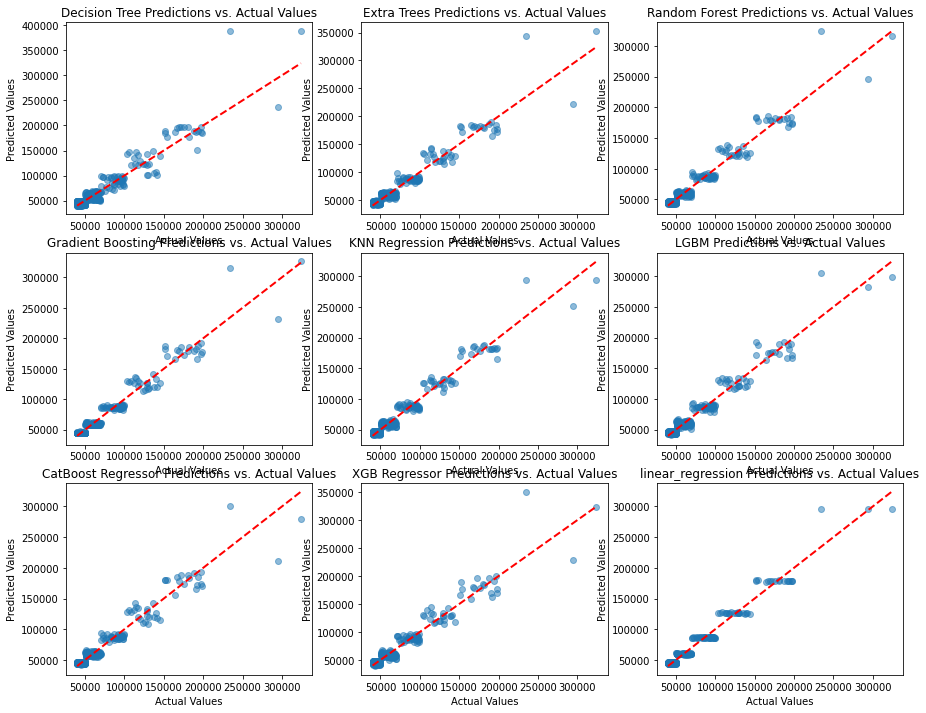

In [159]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.


ValueError: num must be an integer with 1 <= num <= 9, not 10

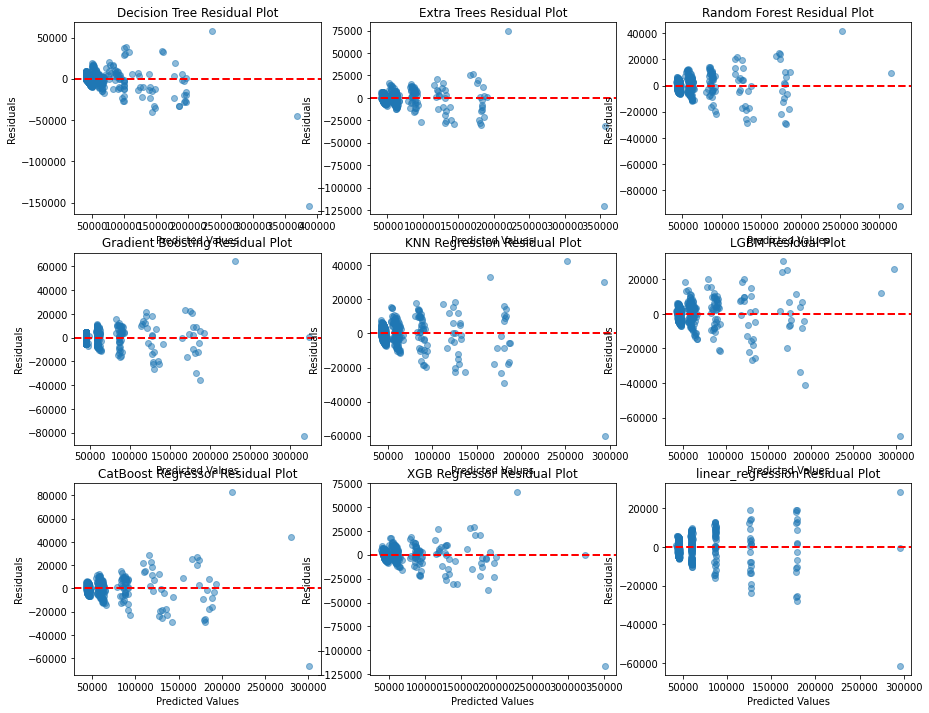

In [160]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.


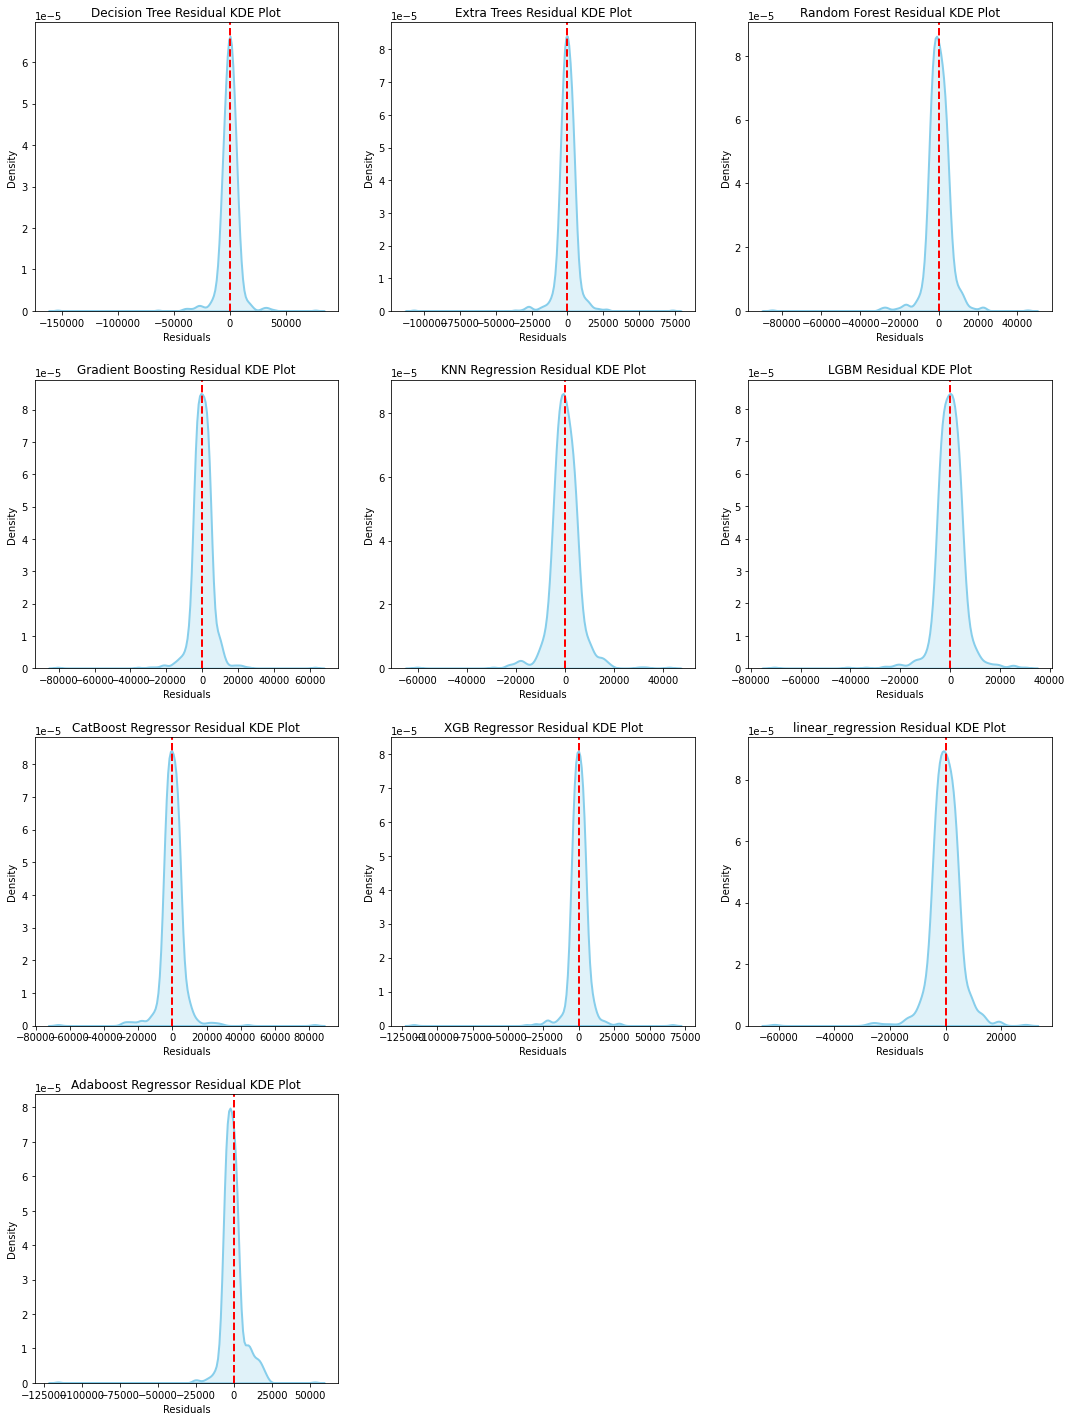

In [161]:
# Determine grid layout based on the number of models
num_models = len(models)
cols = 3
rows = (num_models // cols) + (num_models % cols > 0)

plt.figure(figsize=(15, 5 * rows))  # Adjust figure height based on rows

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # KDE plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True, color='skyblue', linewidth=2)
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual KDE Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.


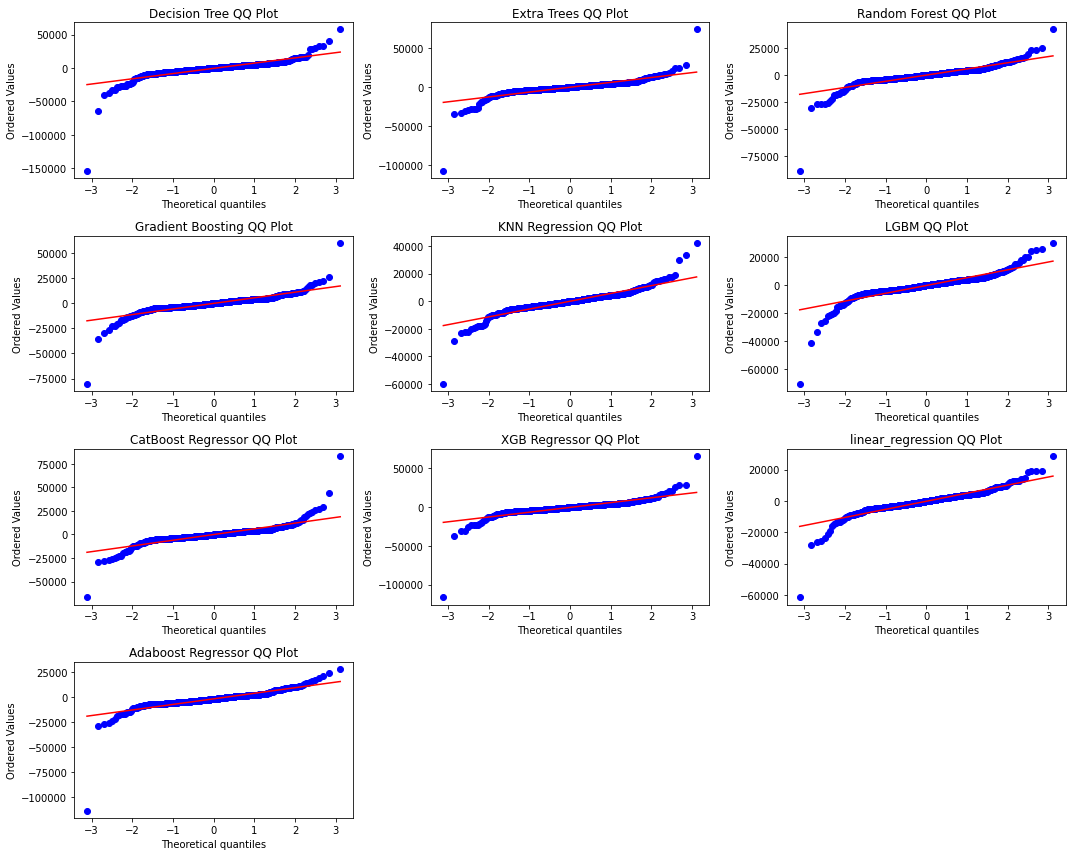

In [162]:
import scipy.stats as stats

# Define the number of models (adjust according to your data)
num_models = len(models)

# Calculate the grid dimensions
rows = (num_models // 3) + (num_models % 3 > 0)  # Ensure at least enough rows
cols = 3  # Fixed number of columns

# Create the plot
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # QQ plot for residuals of each model
    plt.subplot(rows, cols, idx)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{model_name} QQ Plot')

# Adjust layout
plt.tight_layout()
plt.show()

# Repeat the process with log transform and outlier removal 

In [163]:
#Call the clean data 
data

SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  24.0   89207         Web         22.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  24.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  TENURE  
0                  6.0      2.0         0    3916  
1                 13.0      3.0         7    4127  
2                  7.0      3.0         0    3845  
3                  8.0      3.0         0    4326  
4                  3.0      3.0         3    3730  
...                ...      ...       ...     ...  
2634              15.0      5.0        10    4971  
2635              13.0      2.0         0    4040  
2636               1.0      5.0         0    4031  
2637               7.0      3.0         1    3978  
2638              13.0      2.0         2    3793  

[2478 rows x 10 columns]

## Remove Outliers

In [164]:
# Create a copy of the data
data_copy = data.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.02)  # .25
q3 = numeric_data.quantile(0.98)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 2478
Number of rows after removing outliers: 2478
Number of rows removed: 0


# Log Transfromation

In [165]:
import pandas as pd
import numpy as np

# Make a copy of the original DataFrame
df_log = df.copy()

# Apply Log transformation to each numeric column except 'SALARY'
for col in df_log.select_dtypes(include=[np.number]).columns:
    if col != 'SALARY':  # Exclude the target column
        # Ensure all values are positive
        if (df_log[col] <= 0).any():
            df_log[col] = df_log[col] + abs(df_log[col].min()) + 1
        
        # Apply log transformation
        df_log[col] = np.log(df_log[col])

print("Log Transformation Applied Successfully")
df_log.head()

# Update the original DataFrame with the transformed data
df = df_log.copy()


Log Transformation Applied Successfully


## Data Preprocesessing 

In [166]:
# Create a list of columns to encode
categorical_columns = ['SEX','DESIGNATION', 'UNIT']

# Handle missing values in categorical columns (fill with 'Unknown')
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Create a copy of the DataFrame for encoding
encoded_df = df.copy()

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Iterate through each categorical column
for column in categorical_columns:
    # Ensure no missing values before applying encoding
    if df[column].isnull().sum() > 0:
        print(f"Missing values in {column}. Filling them now.")
        df[column] = df[column].fillna('Unknown')

    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Final DataFrame after encoding
df = encoded_df.copy()

# Drop the 'UNIT_nan' and 'DESIGNATION_nan' columns if they exist
df = df.drop(columns=['UNIT_nan', 'DESIGNATION_nan'], errors='ignore')

# Display the updated DataFrame
df.head()

AGE   SALARY  LEAVES USED  LEAVES REMAINING   RATINGS  PAST EXP  \
0  3.044522  44570.0     3.178054          1.945910  0.693147  0.000000   
1  3.178054  89207.0     3.091042          2.639057  1.098612  2.079442   
2  3.044522  40955.0     3.135494          2.079442  1.098612  0.000000   
3  3.091042  45550.0     3.091042          2.197225  1.098612  0.000000   
4  3.178054  43161.0     3.295837          1.386294  1.098612  1.386294   

     TENURE  SEX_F  SEX_M  DESIGNATION_Analyst  DESIGNATION_Associate  \
0  8.272826    1.0    0.0                  1.0                    0.0   
1  8.325306    1.0    0.0                  0.0                    1.0   
2  8.254529    1.0    0.0                  1.0                    0.0   
3  8.372399    1.0    0.0                  1.0                    0.0   
4  8.224164    0.0    1.0                  1.0                    0.0   

   DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                   0.0                  0.0                         0.0   
1                   0.0                  0.0                         0.0   
2                   0.0                  0.0                         0.0   
3                   0.0                  0.0                         0.0   
4                   0.0                  0.0                         0.0   

   DESIGNATION_Senior Manager  UNIT_Finance  UNIT_IT  UNIT_Management  \
0                         0.0           1.0      0.0              0.0   
1                         0.0           0.0      0.0              0.0   
2                         0.0           1.0      0.0              0.0   
3                         0.0           0.0      1.0              0.0   
4                         0.0           0.0      0.0              0.0   

   UNIT_Marketing  UNIT_Operations  UNIT_Web  
0             0.0              0.0       0.0  
1             0.0              0.0       1.0  
2             0.0              0.0       0.0  
3             0.0              0.0       0.0  
4             0.0              1.0       0.0

In [167]:
# drop null values
df = df.dropna()

# Features (independent features) 
X = df.drop(columns={'SALARY'})

# Target variable/ Dependent variable 
y = df['SALARY']

In [168]:
X

AGE  LEAVES USED  LEAVES REMAINING   RATINGS  PAST EXP    TENURE  \
0     3.044522     3.178054          1.945910  0.693147  0.000000  8.272826   
1     3.178054     3.091042          2.639057  1.098612  2.079442  8.325306   
2     3.044522     3.135494          2.079442  1.098612  0.000000  8.254529   
3     3.091042     3.091042          2.197225  1.098612  0.000000  8.372399   
4     3.178054     3.295837          1.386294  1.098612  1.386294  8.224164   
...        ...          ...               ...       ...       ...       ...   
2473  3.258097     3.258097          1.609438  1.609438  0.000000  8.449984   
2474  3.044522     2.833213          2.639057  1.098612  0.000000  8.368693   
2475  3.044522     2.995732          2.397895  1.098612  0.000000  8.276140   
2476  3.091042     2.944439          2.484907  0.693147  0.000000  8.228978   
2477  3.218876     2.772589          2.708050  1.386294  1.098612  8.271037   

      SEX_F  SEX_M  DESIGNATION_Analyst  DESIGNATION_Associate  \
0       1.0    0.0                  1.0                    0.0   
1       1.0    0.0                  0.0                    1.0   
2       1.0    0.0                  1.0                    0.0   
3       1.0    0.0                  1.0                    0.0   
4       0.0    1.0                  1.0                    0.0   
...     ...    ...                  ...                    ...   
2473    1.0    0.0                  0.0                    0.0   
2474    1.0    0.0                  1.0                    0.0   
2475    1.0    0.0                  1.0                    0.0   
2476    1.0    0.0                  1.0                    0.0   
2477    0.0    1.0                  1.0                    0.0   

      DESIGNATION_Director  DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                      0.0                  0.0                         0.0   
1                      0.0                  0.0                         0.0   
2                      0.0                  0.0                         0.0   
3                      0.0                  0.0                         0.0   
4                      0.0                  0.0                         0.0   
...                    ...                  ...                         ...   
2473                   0.0                  0.0                         0.0   
2474                   0.0                  0.0                         0.0   
2475                   0.0                  0.0                         0.0   
2476                   0.0                  0.0                         0.0   
2477                   0.0                  0.0                         0.0   

      DESIGNATION_Senior Manager  UNIT_Finance  UNIT_IT  UNIT_Management  \
0                            0.0           1.0      0.0              0.0   
1                            0.0           0.0      0.0              0.0   
2                            0.0           1.0      0.0              0.0   
3                            0.0           0.0      1.0              0.0   
4                            0.0           0.0      0.0              0.0   
...                          ...           ...      ...              ...   
2473                         1.0           0.0      0.0              1.0   
2474                         0.0           0.0      1.0              0.0   
2475                         0.0           0.0      0.0              0.0   
2476                         0.0           0.0      0.0              0.0   
2477                         0.0           0.0      0.0              0.0   

      UNIT_Marketing  UNIT_Operations  UNIT_Web  
0                0.0              0.0       0.0  
1                0.0              0.0       1.0  
2                0.0              0.0       0.0  
3                0.0              0.0       0.0  
4                0.0              1.0       0.0  
...              ...              ...       ...  
2473             0.0              0.0       0.0  
2474   

# Splitting and Training 

In [169]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the scaler
scaler = StandardScaler() # MinMaxScaler

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


## Log Transformed Models

In [170]:
# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'LGBM': LGBMRegressor(verbose=0),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor(),
    'linear_regression': LinearRegression(),
    'Adaboost Regressor': AdaBoostRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


Model           MAE           MSE          RMSE       MAPE  \
0       Decision Tree   6053.380000  1.535210e+08  12390.360862   9.470958   
1         Extra Trees   4958.649457  8.430719e+07   9181.894756   7.763867   
2       Random Forest   4991.270071  9.278695e+07   9632.598047   7.668426   
3   Gradient Boosting   4772.407377  8.402219e+07   9166.361671   7.347343   
4      KNN Regression   8684.428571  3.255709e+08  18043.584371  11.712156   
5                LGBM   4989.920938  8.658991e+07   9305.369946   7.686548   
6  CatBoost Regressor   4774.182700  7.561425e+07   8695.645582   7.455941   
7       XGB Regressor   5228.895000  1.068095e+08  10334.867160   8.060203   
8   linear_regression  13856.709620  3.343094e+08  18284.129845  25.929668   
9  Adaboost Regressor   5878.039453  8.428754e+07   9180.824318  10.227703   

         R2  Training Time (s)  Prediction Time (s)  
0  0.839836           0.019947             0.000000  
1  0.912045           1.888948             0.034907  
2  0.903198           1.293542             0.029919  
3  0.912342           0.291222             0.001994  
4  0.660342           0.013962             0.056849  
5  0.909663           0.126660             0.009974  
6  0.921114           2.892267             0.004987  
7  0.888569           0.214423             0.005986  
8  0.651225           0.000999             0.000996  
9  0.912065           0.104722             0.007979

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


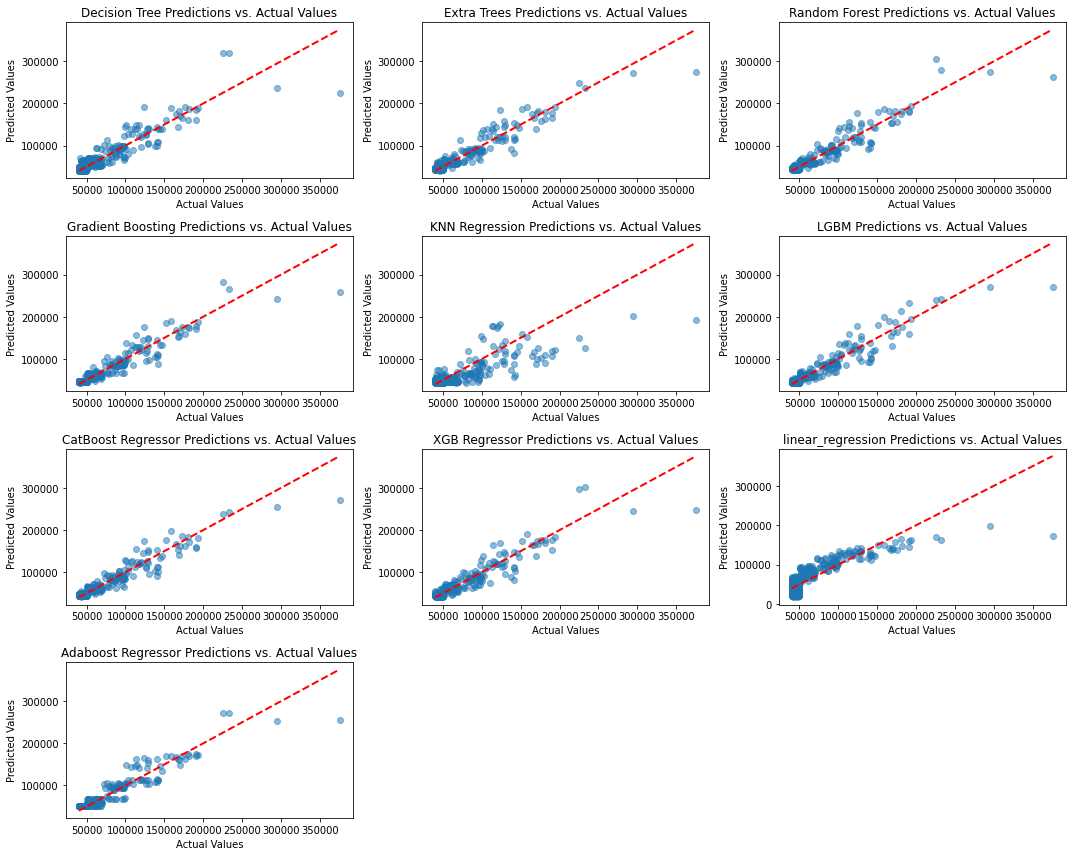

In [176]:
# Define the number of rows and columns (increase as necessary)
rows, cols = 4, 3  # 4 rows and 3 columns to handle 10 models

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


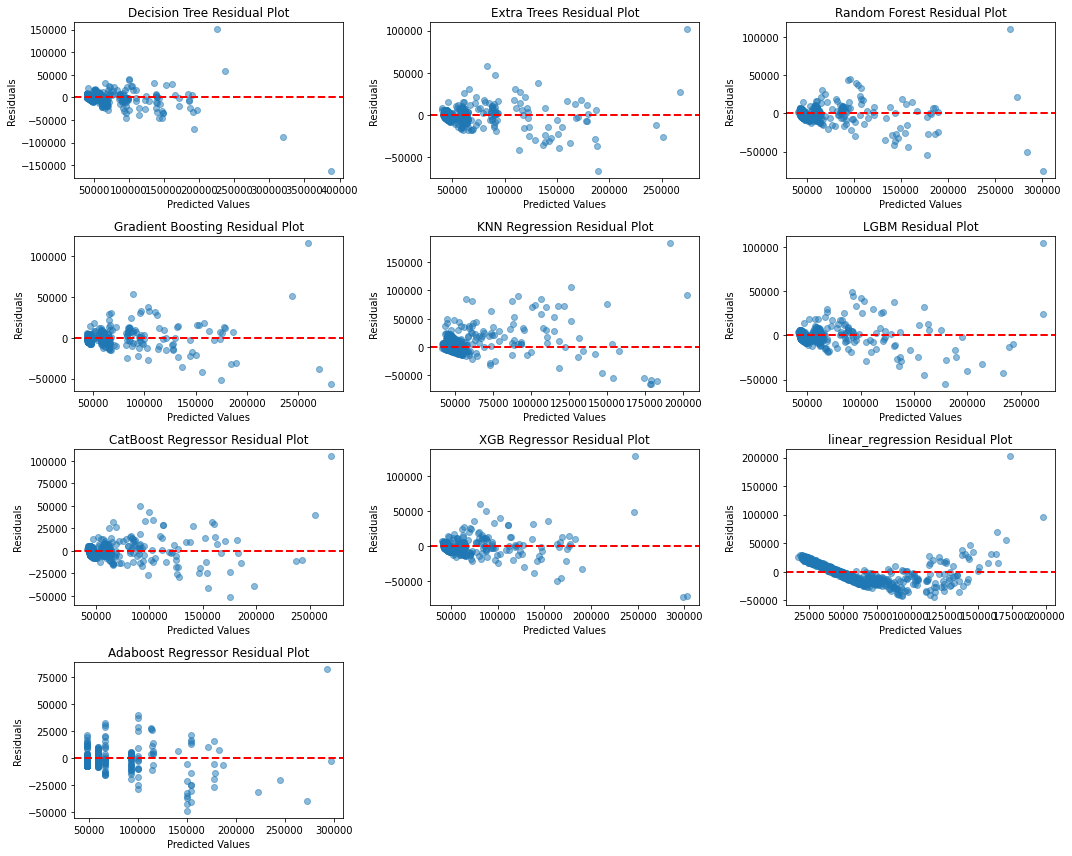

In [178]:
# Define a larger grid size
rows, cols = 4, 3  # 4 rows, 3 columns for 12 plots

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


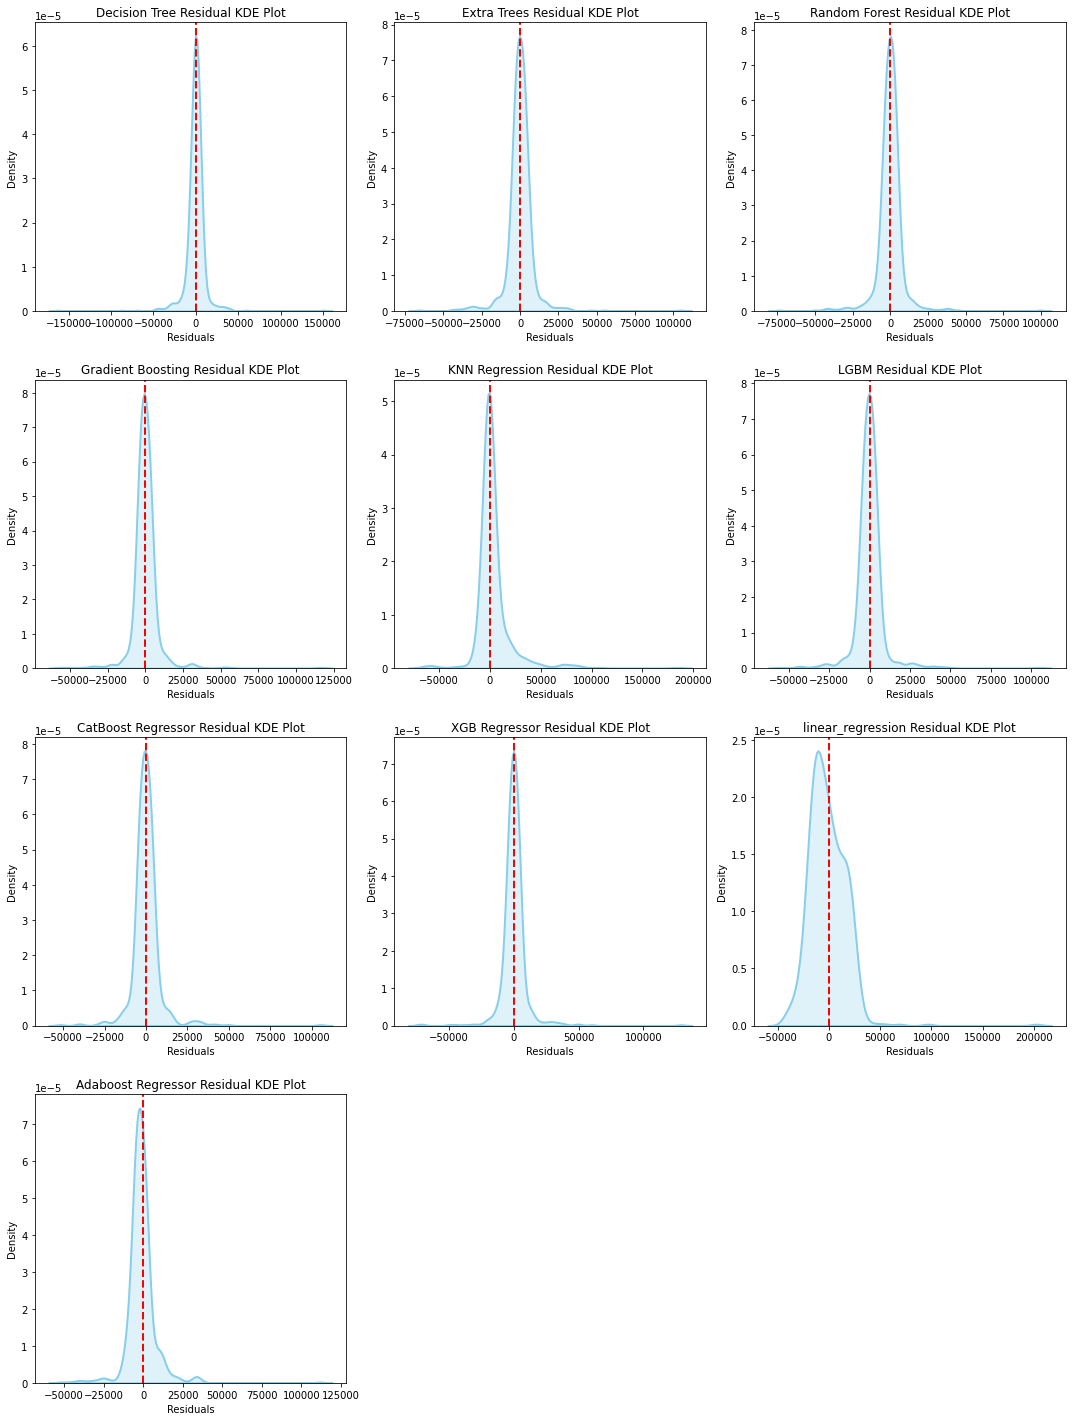

In [180]:

# Determine grid layout based on the number of models
num_models = len(models)
cols = 3
rows = (num_models // cols) + (num_models % cols > 0)

plt.figure(figsize=(15, 5 * rows))  # Adjust figure height based on rows

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # KDE plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True, color='skyblue', linewidth=2)
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual KDE Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


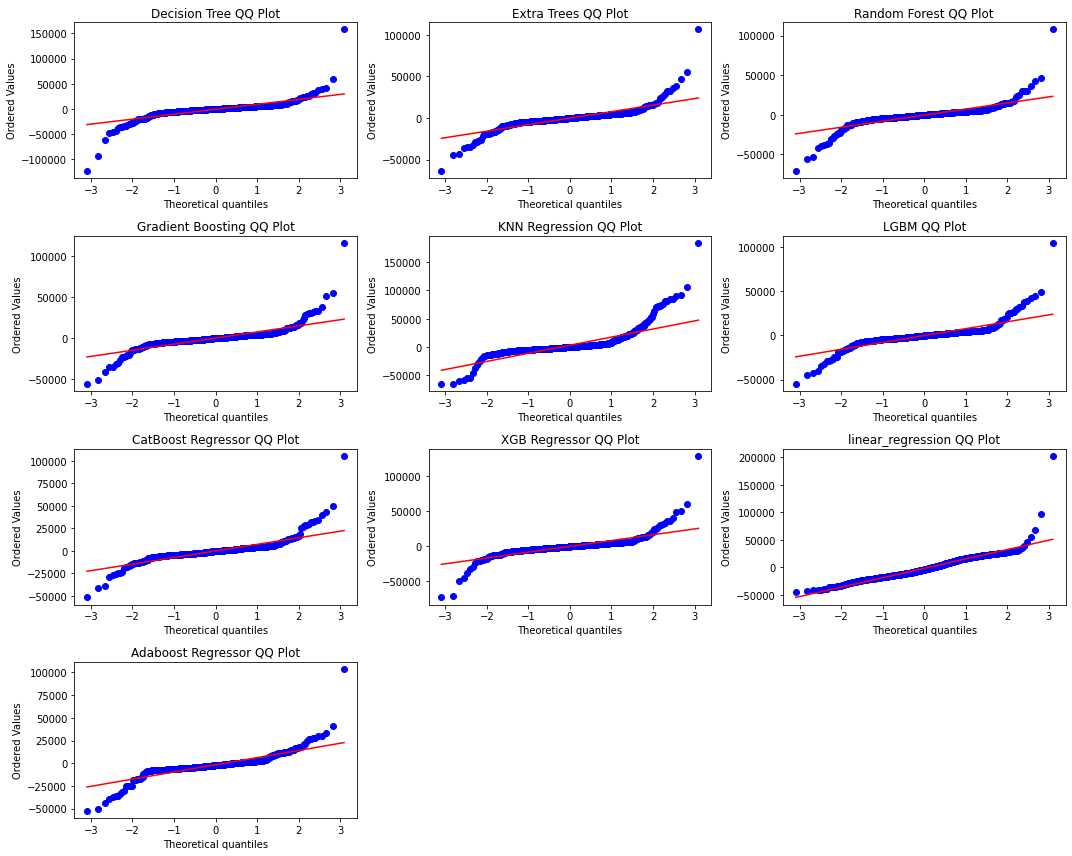

In [181]:
import scipy.stats as stats

# Define the number of models (adjust according to your data)
num_models = len(models)

# Calculate the grid dimensions
rows = (num_models // 3) + (num_models % 3 > 0)  # Ensure at least enough rows
cols = 3  # Fixed number of columns

# Create the plot
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # QQ plot for residuals of each model
    plt.subplot(rows, cols, idx)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{model_name} QQ Plot')

# Adjust layout
plt.tight_layout()
plt.show()